In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 


data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.dropna(inplace = True)

In [5]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


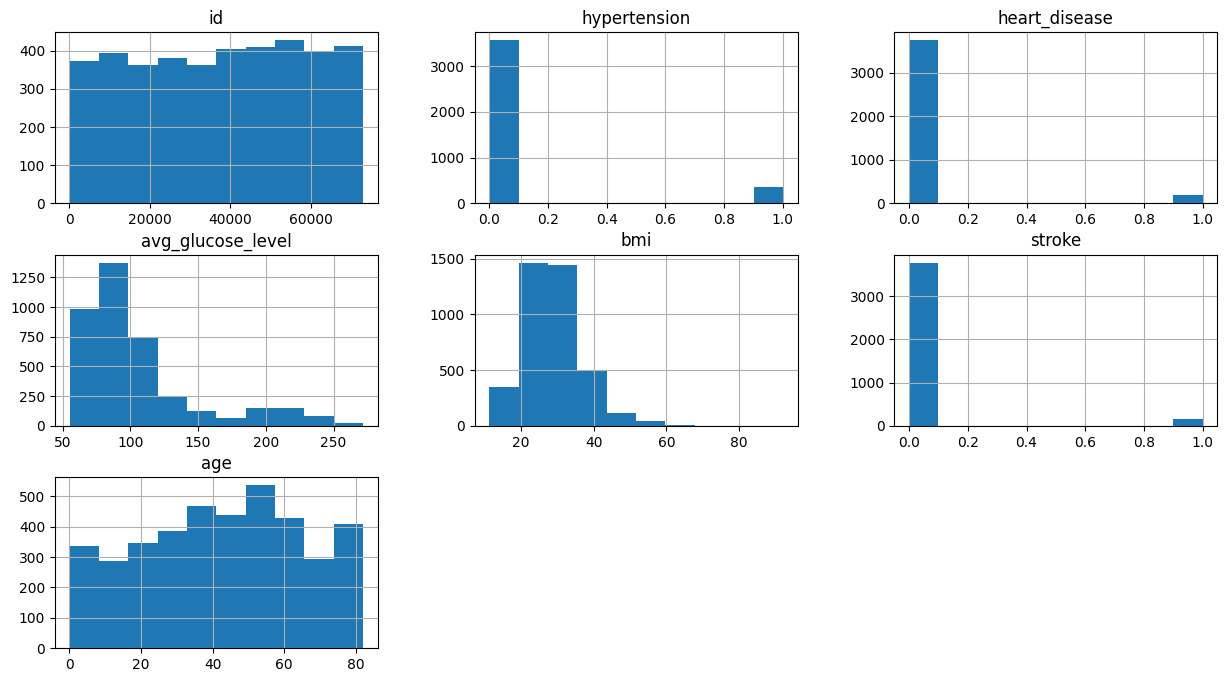

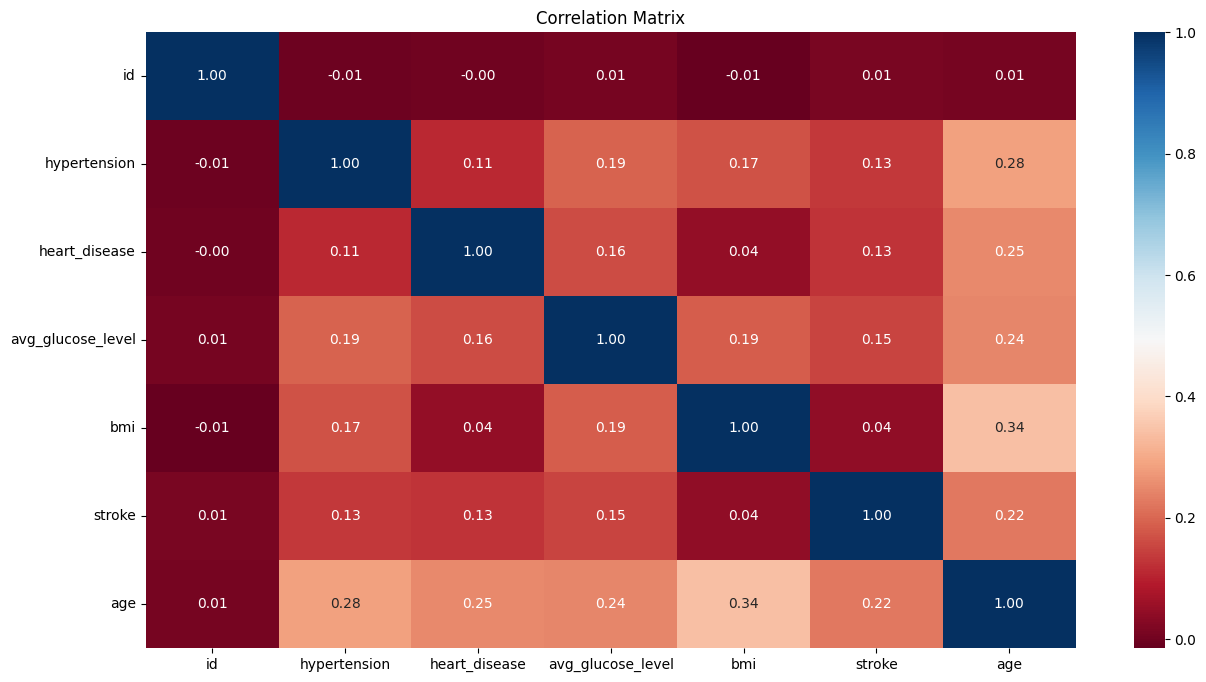

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns 


X = data.drop(['age'], axis=1)
y = data['age']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_data = pd.concat([X_train, y_train], axis=1)


train_data.select_dtypes(include='number').hist(figsize=(15, 8))
plt.show()

numeric_columns = train_data.select_dtypes(include=[np.number]).columns
correlation_matrix = train_data[numeric_columns].corr()


plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()



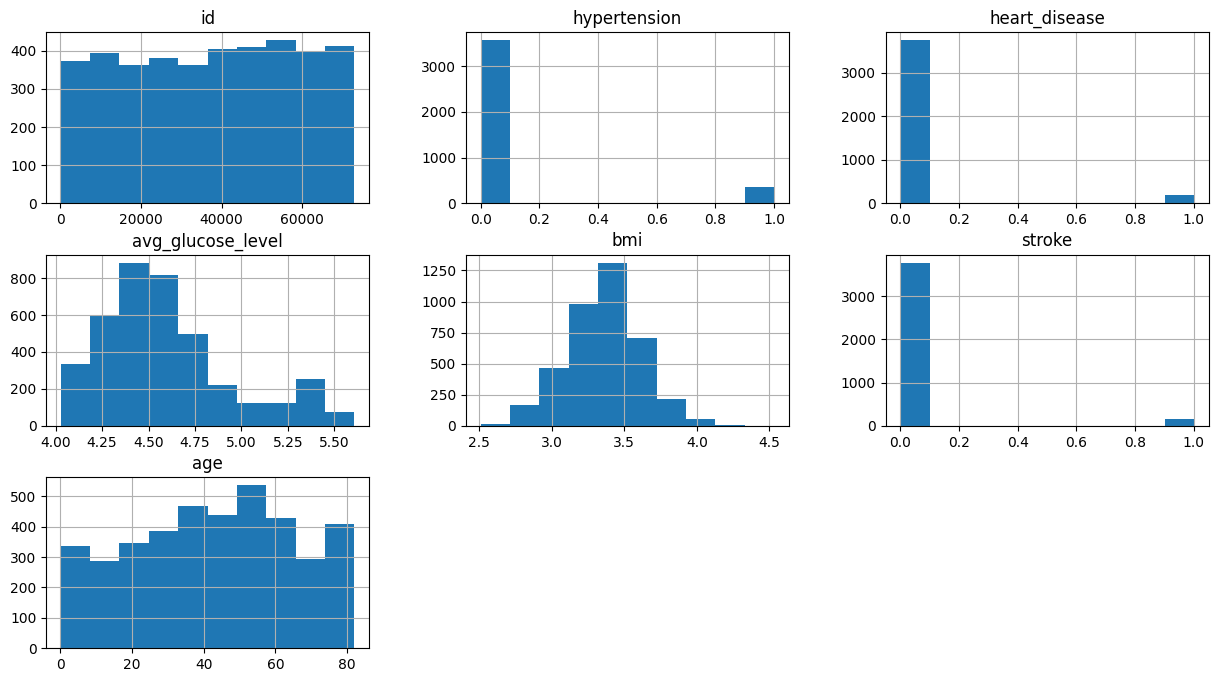

In [7]:



if 'avg_glucose_level' in train_data.columns:
    train_data['avg_glucose_level'] = np.log(train_data['avg_glucose_level'].fillna(0) + 1)
if 'bmi' in train_data.columns:
    train_data['bmi'] = np.log(train_data['bmi'].fillna(0) + 1)


train_data.hist(figsize=(15, 8))
plt.show()


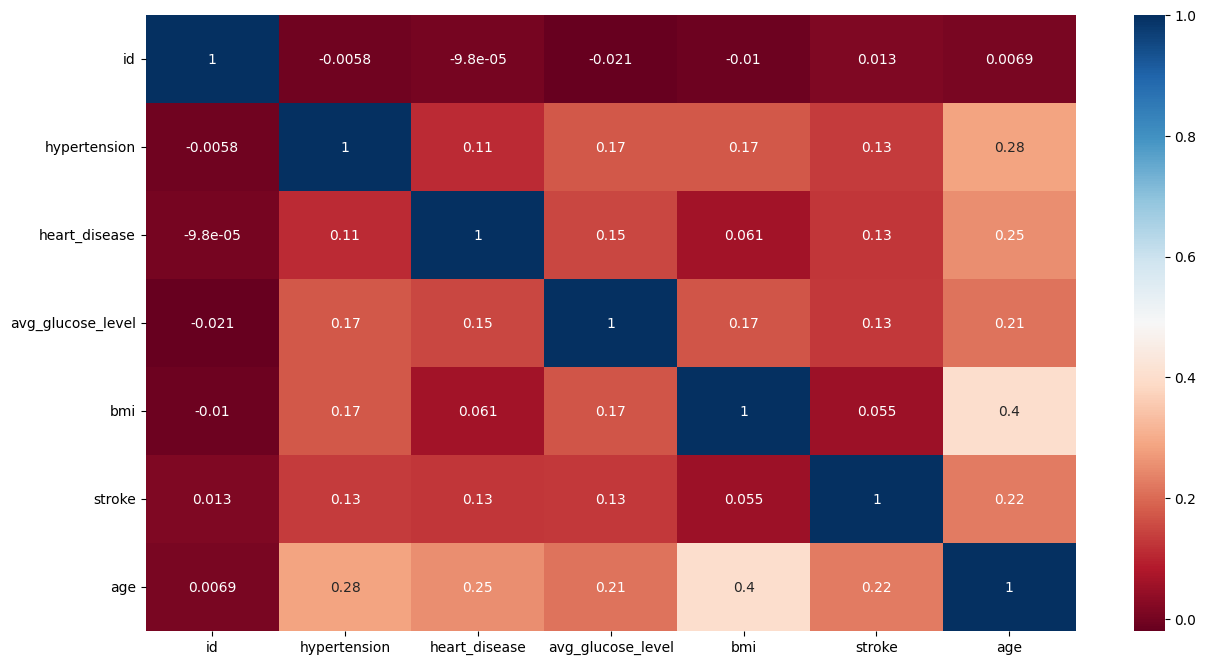

In [8]:
if 'gender' in train_data.columns and train_data['gender'].nunique() > 1:
    
    train_data = train_data.join(pd.get_dummies(train_data['gender'], drop_first=True))
    train_data.drop(['gender'], axis=1, inplace=True)


train_data_numeric = train_data.select_dtypes(include=['number'])


plt.figure(figsize=(15, 8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap="RdBu")
plt.show()

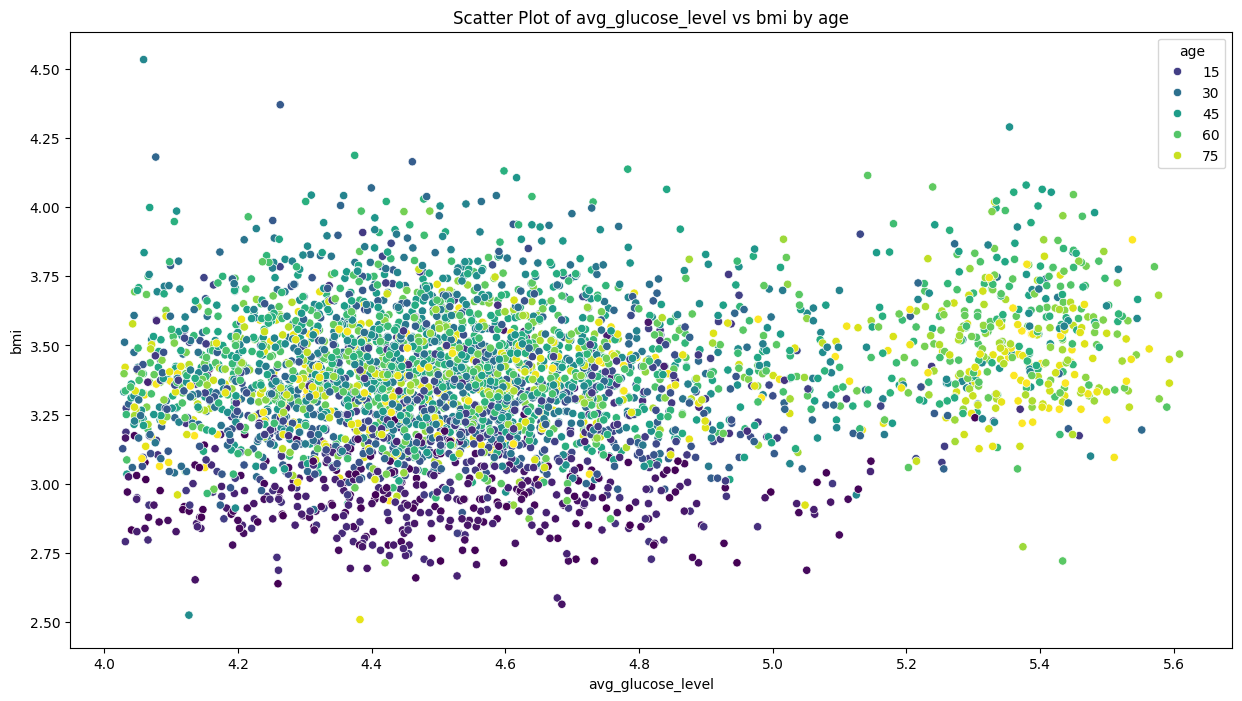

In [9]:
plt.figure(figsize=(15, 8))
scatter_plot = sns.scatterplot(x="avg_glucose_level", y="bmi", data=train_data, 
                                hue="age", palette="viridis")
scatter_plot.set_xlabel("avg_glucose_level")
scatter_plot.set_ylabel("bmi")
scatter_plot.set_title("Scatter Plot of avg_glucose_level vs bmi by age")
plt.show()


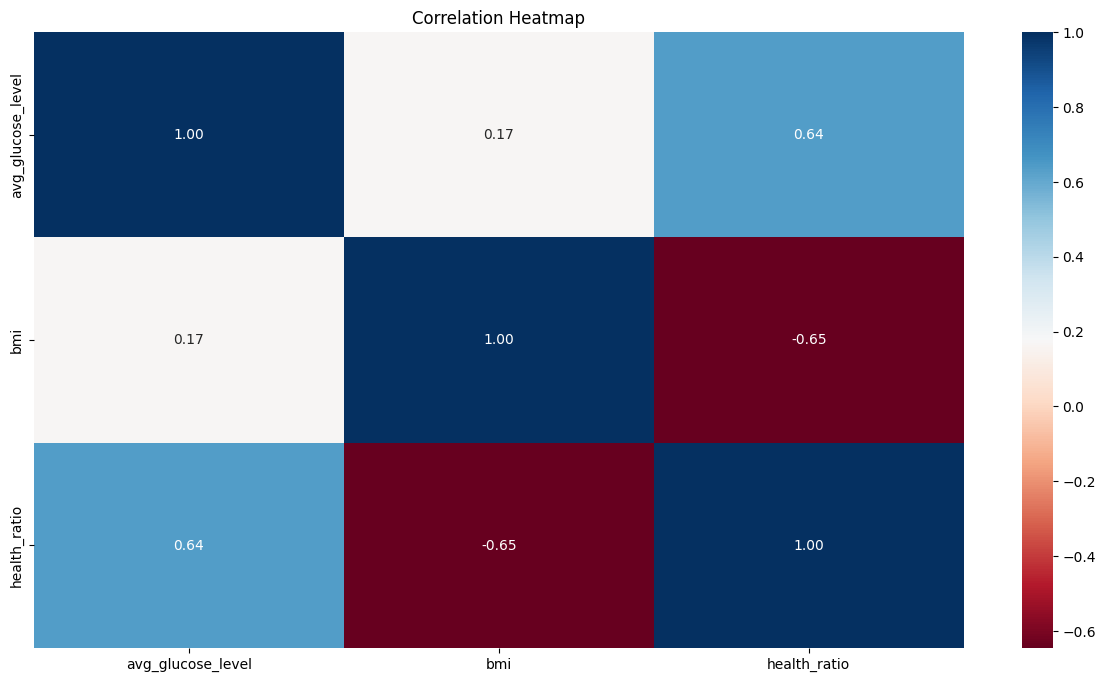

In [10]:
train_data['health_ratio'] = train_data['avg_glucose_level'] / train_data['bmi'].replace(0, np.nan)

# Define relevant columns for correlation
relevant_columns = ['avg_glucose_level', 'bmi', 'health_ratio']
corr_matrix = train_data[relevant_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression


X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align test data with training data columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Check and ensure y_train is numeric
if y_train.dtype == 'object':
    y_train = y_train.astype(float)




In [12]:
X_train

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3565,68302,0,0,65.77,31.2,0,False,False,True,False,True,False,False,True,False,True,False
898,62716,0,0,81.64,32.8,0,False,False,True,False,False,True,False,True,False,False,False
2707,46498,0,0,217.40,36.6,0,False,False,True,False,True,False,False,True,False,True,False
4198,4148,0,0,71.18,23.9,0,True,False,True,False,False,True,False,True,True,False,False
2746,35315,0,0,95.88,28.5,0,True,False,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,45530,0,0,89.30,22.1,0,False,False,False,False,True,False,False,True,False,True,False
511,27832,0,0,82.93,29.7,0,False,False,True,False,True,False,False,False,False,False,True
3247,64498,0,0,90.65,22.1,0,False,False,True,False,True,False,False,False,True,False,False
3946,8041,0,0,93.51,20.8,0,False,False,False,False,False,False,True,False,False,False,False


In [13]:
y_train

3565    40.0
898     59.0
2707    57.0
4198    81.0
2746    65.0
        ... 
4613    19.0
511     51.0
3247    53.0
3946    11.0
916     63.0
Name: age, Length: 3927, dtype: float64

In [14]:
# Train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Prepare the test data
test_data = pd.concat([X_test, y_test], axis=1)

# Log-transform columns (ensure no negative or missing values)
test_data['avg_glucose_level'] = np.log(test_data['avg_glucose_level'].clip(lower=1).fillna(test_data['avg_glucose_level'].mean()))
test_data['bmi'] = np.log(test_data['bmi'].clip(lower=1).fillna(test_data['bmi'].mean()))

# One-hot encode 'gender' (if it exists)
if 'gender' in test_data.columns:
    test_data['gender'] = test_data['gender'].fillna('Unknown')
    test_data = test_data.join(pd.get_dummies(test_data['gender'], drop_first=True)).drop(['gender'], axis=1)

# Add health ratio
test_data['health_ratio'] = test_data['avg_glucose_level'] / test_data['bmi']

# Ensure X_test matches the columns of X_train
X_test = test_data.drop(['age'], axis=1, errors='ignore')
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Ensure y_test is numeric and exists
if 'age' in test_data.columns:
    y_test = test_data['age']
else:
    raise KeyError("The 'age' column is missing from test_data.")

# Evaluate the model
score = reg.score(X_test, y_test)



In [15]:
score

0.642369794513618

In [20]:
from sklearn.preprocessing import StandardScaler  # Correct class name
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Import the regressor

# Assuming train_data is already defined
X = train_data.drop(['age'], axis=1)
y = train_data['age']

X = pd.get_dummies(X, drop_first=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()  # Corrected instantiation/
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)

reg = LinearRegression()
reg.fit(X_train_s, y_train)


LinearRegression()

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)


RandomForestRegressor()

In [24]:
forest.score(X_val_s, y_val)

0.6372109257144265

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the RandomForestRegressor
forest = RandomForestRegressor(random_state=40)  # Add a random_state for reproducibility

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=forest,  # Explicitly specify the estimator
    param_grid=param_grid,
    cv=5,  # Use 5-fold cross-validation
    scoring="neg_mean_squared_error",  # Correct scoring metric
    return_train_score=True,
    n_jobs=-1  # Use all available cores for parallel processing (optional for efficiency)
)

# Fit the grid search to the data
grid_search.fit(X_train_s, y_train)




GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 200}

In [40]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=40)

In [41]:
grid_search.best_estimator_.score(X_val_s, y_val)

0.6536349359300083